In [170]:
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score

In [171]:
path ='country_data.csv'
country_df= pd.read_csv(path)

In [172]:
#previewing the first 5 rows of the dataset
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [173]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [174]:
#from the above, we can observe the scale for import, health and export is a bit low despite being known to have high values
#This is because they were calculated as a % of the GDP per country
#We can get the the actual values of these features from the GDP per capita
country_df['exports'] = country_df['exports']*country_df['gdpp']/100
country_df['imports'] = country_df['imports']*country_df['gdpp']/100
country_df['health'] = country_df['health']*country_df['gdpp']/100

In [175]:
#Looking at a statistical summary of the dataset
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [176]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [177]:
#Data Exploration

In [178]:
#We have 167 countries in our data set
#We can visualize the numerical features in our dataset using a boxplot
'''custom_params = {"axes.spines.right": False, "axes.spines.top": False} 
sb.set_theme(style="ticks", palette='cress',rc=custom_params) #setting our theme
fid = plt.subplot'''

'custom_params = {"axes.spines.right": False, "axes.spines.top": False} \nsb.set_theme(style="ticks", palette=\'cress\',rc=custom_params) #setting our theme\nfid = plt.subplot'

Text(0.5, 1.0, 'Box Plot of Socio-economic and Health Factors')

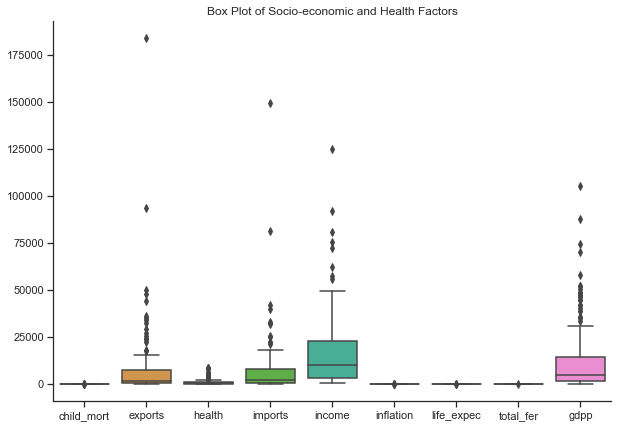

In [179]:
#We have 167 countries in our data set
#We can visualize the numerical features in our dataset using a boxplot
custom_params = {"axes.spines.right": False, "axes.spines.top": False} 
sb.set_theme(style="ticks", palette='inferno_r',rc=custom_params) #setting our theme
fig = plt.figure(figsize=(10,7))
sb.boxplot(data=country_df)
plt.title('Box Plot of Socio-economic and Health Factors')

1. From the box plot, we observed that income and gdpp account for the largest values in the dataset.
2. The distribution for exports, imports, income and gdpp may suggest skewness i.e some countries being responsible for most of the figures in these categories.
3. We can explore this further using a histogram 

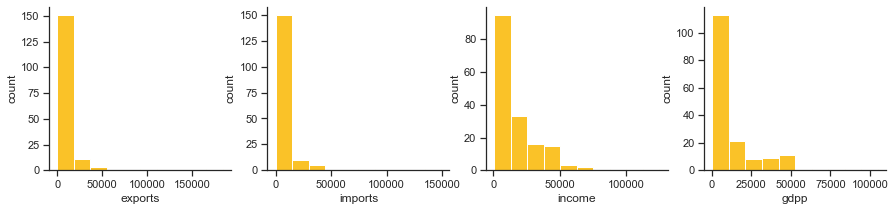

In [180]:
count =1
plt.subplots(figsize=(15, 3))
for x in ['exports','imports','income','gdpp']:
    plt.subplot(1,4,count)
    plt.hist(x=country_df[x])
    plt.xlabel(x)
    plt.ylabel('count')
    count+=1

In [181]:
#From the above, we can see that the amount of exports, imports, income and gdpp are not evenly spread
#This could suggest a few countries being responsible for a % of the figures
#We can also look at the relationships between the features

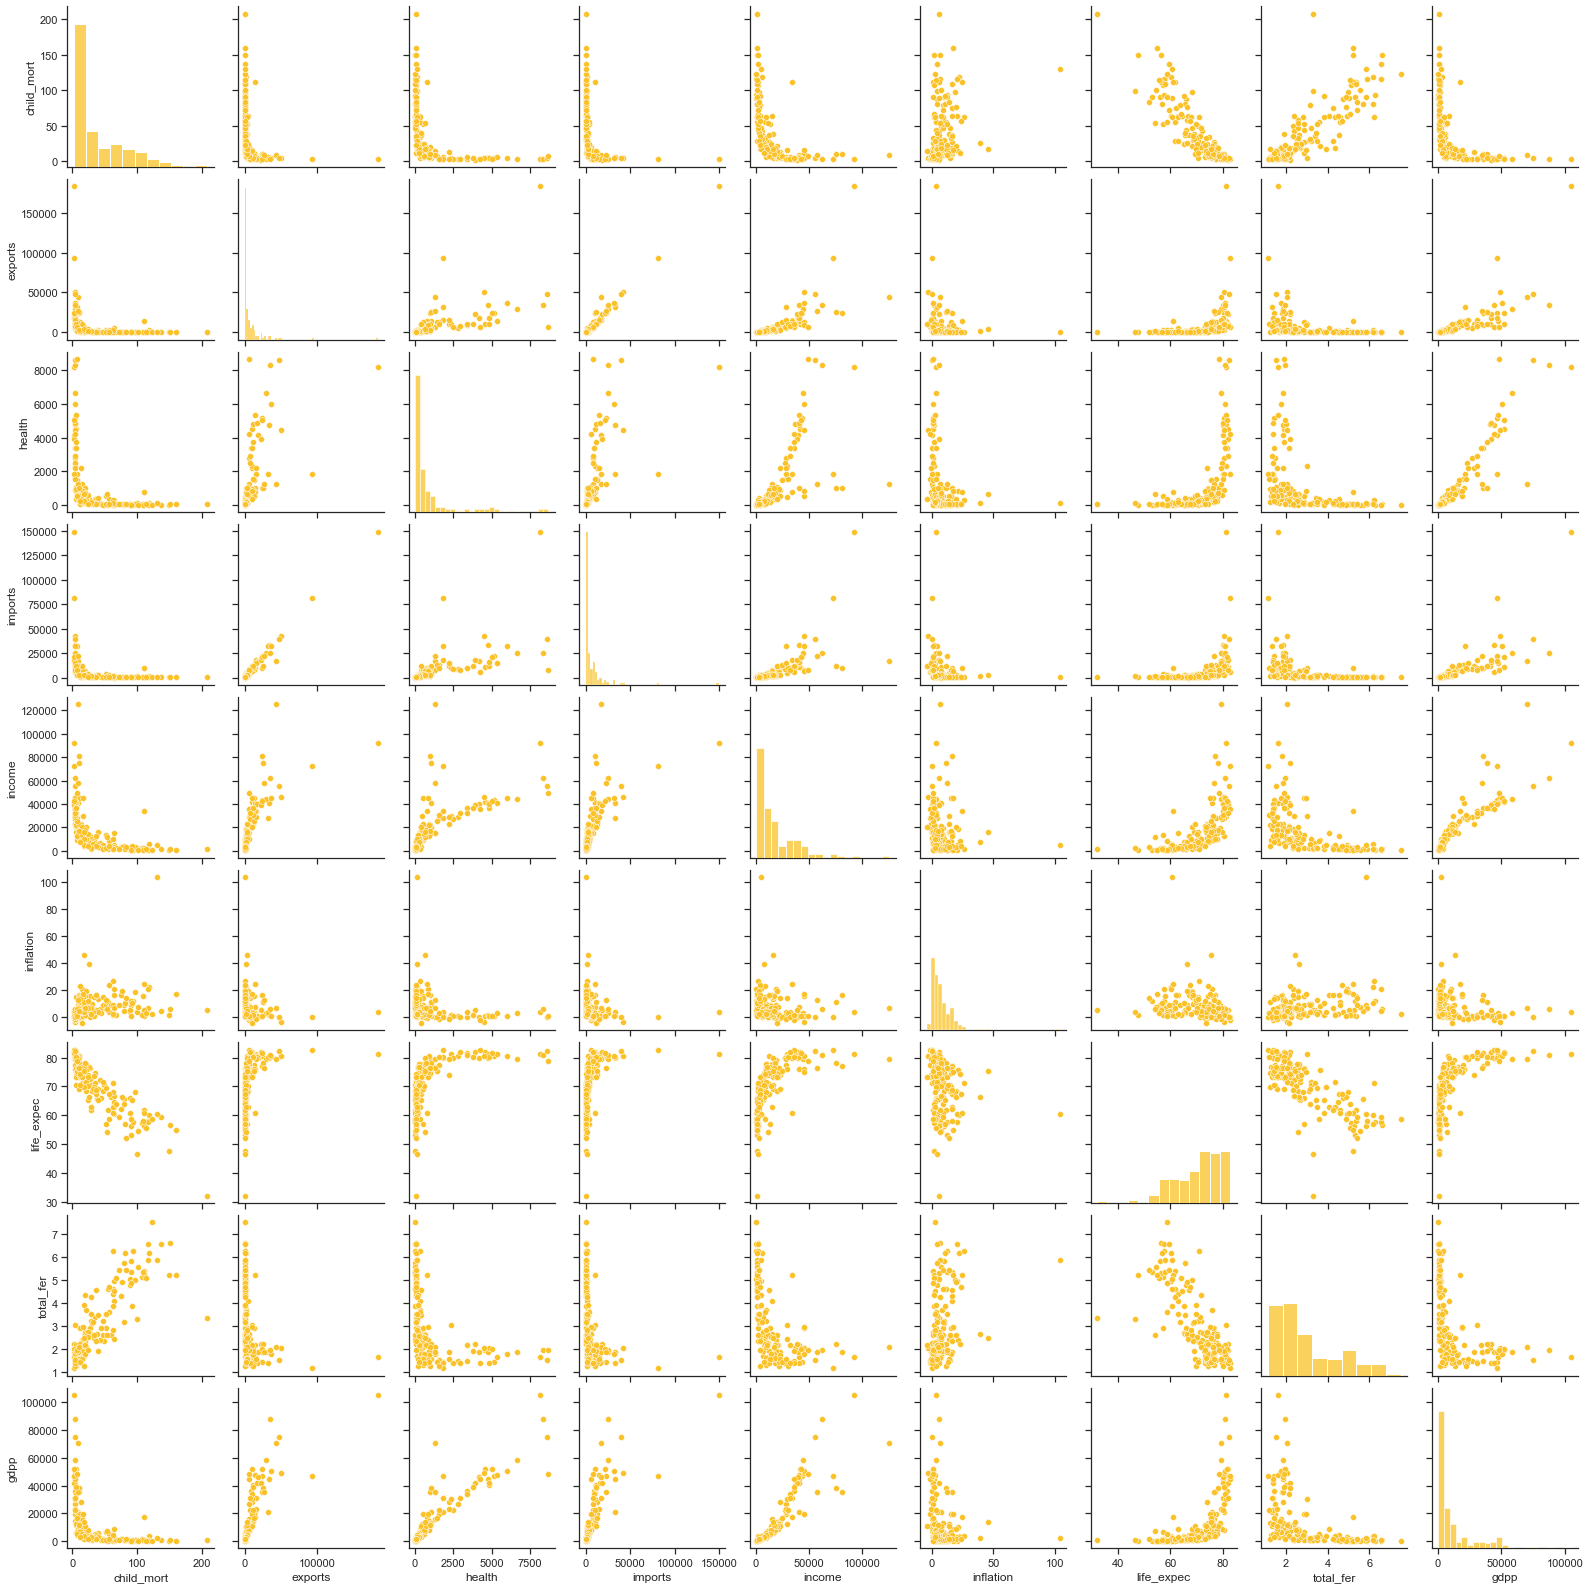

In [182]:
sb.pairplot(country_df,kind='scatter')

From the scatter plots above, we observe a positive linear relationship between income, export, import and GDPP
We also observe that high GDPP translates to high income,imports, exports,health and life expectancy and an inverse relationship with child mortality etc having an inverse relationshipt(i.e high gdpp, low child mortality)

We can get a better understanding about how these socio-economic and factors are grouped and where each country falls(i.e Clusters).
Since the values of these factors are not evenly distrubted, owing to socio-economis inequliaties, we can get a better understanding of which countries are responsilbe for a higher % of these figures using an unsupervised ML algorithm 
calle K-means clustering

In [183]:
#Cleaning the dataset 

In [184]:
#Looking at the data type for the columns to ensure the have the right datatype
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [185]:
#Checking for missing values
country_df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [186]:
#checking for null values
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [187]:
#No missing values

In [188]:
#checking for duplicates
country_df.duplicated().sum()

0

In [189]:
#The data set does not contain duplicates

## K-Means

In [190]:
#Before using K-means, we can visual
country_df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


In [191]:
#Selecting income, child mortality and  life expectancy as features

In [192]:
k_features = country_df[['income','child_mort','life_expec']]

In [193]:
k_features.head()

,income,child_mort,life_expec
0,1610,90.2,56.2
1,9930,16.6,76.3
2,12900,27.3,76.5
3,5900,119.0,60.1
4,19100,10.3,76.8


In [194]:
#standardizing the features
k_features=preprocessing.StandardScaler().fit_transform(k_features)

In [195]:
k_features[0:2]

array([[-0.8082454 ,  1.29153238, -1.61909203],
       [-0.3753689 , -0.5389489 ,  0.64786643]])

In [196]:
#Before fitting k number of clusters, we can find the optimal k values using the elbow method

In [197]:
'''In this method, we compute the within cluster sum of square known as WCSS(i.e sum of squared distance between each point and the centroid in a cluster) for each value of K. We plot the WCSS vs the K value and we notice that as K increases, WCSS reduces. The point at which there is a rapid change between the WCSS and K value forms an elbow shape and is our optimal K value'''

'In this method, we compute the within cluster sum of square known as WCSS(i.e sum of squared distance between each point and the centroid in a cluster) for each value of K. We plot the WCSS vs the K value and we notice that as K increases, WCSS reduces. The point at which there is a rapid change between the WCSS and K value forms an elbow shape and is our optimal K value'

In [198]:
'''The silhouette coeeficient which measures the amount of similiriaties and 
disimiliarities between cluster distances is also used.'''

'The silhouette coeeficient which measures the amount of similiriaties and \ndisimiliarities between cluster distances is also used.'

In [199]:
#defining a function for the elbow method
def elbow_method(feature_set,range_stop):
    #store WCSS for different k means
    wcss = []
    #range for K values
    K = range(1,range_stop)
    #set k number of clusters for range in k
    for k in K:
        kmeansModel = KMeans(n_clusters=k)
        kmeansModel.fit(feature_set)
        #add wcss to list
        wcss.append(kmeansModel.inertia_)
    #visualize WCSS
    #plt.figure(figsize=(16,8))
    plt.plot(K, wcss, 'bx-')
    plt.xlabel('K-Values')
    plt.ylabel('Within Cluster Sum of Squares')
    plt.title('The Elbow Method showing the optimal K-value')
    plt.show()

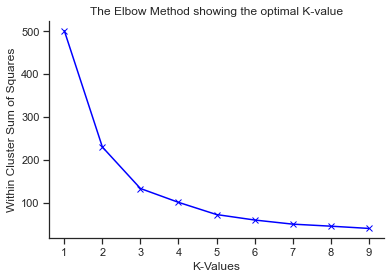

In [200]:
#call our function
elbow_method(k_features,10)

In [201]:
def silhouette_method(feature_set,range_stop):
    #store silhouette coeeficient for different k means
    silhouette_scr = []
    
    #range for K values
    K = range(2,range_stop)
    #set k number of clusters for range in k
    for k in K:
        kmeansModel = KMeans(n_clusters=k)
        kmeansModel.fit(feature_set)
        c_labels=kmeansModel.labels_
        #add silhouette coeeficient
        silhouette_scr.append(silhouette_score(feature_set,c_labels))
    #visualize silhouette coeeficient
    plt.plot(K, silhouette_scr, 'bx-')
    plt.xlabel('K-Values')
    plt.ylabel('Silhouette coeeficient')
    plt.title('The Silhouette coefficient showing the optimal K-value')
    plt.show()

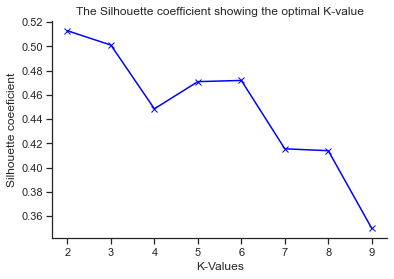

In [202]:
silhouette_method(k_features,10)

In [203]:
#We see of optimal K value is 3
#initializing the k-means algorithm with 3 clusters
kmeans = KMeans(n_clusters = 3, init='k-means++',random_state=4)

In [204]:
#fitting the model
kmeans.fit(k_features)

KMeans(n_clusters=3, random_state=4)

In [205]:
#Making predictions
y_kmeans = kmeans.predict(k_features)

In [206]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(y_kmeans)

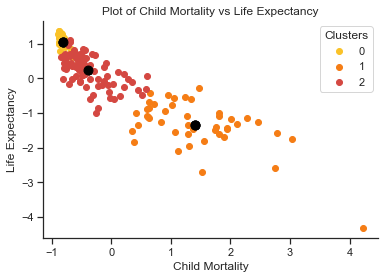

In [207]:
#visualizing the clusters:
for i in u_labels:
    plt.scatter(k_features[y_kmeans == i , 1] , k_features[y_kmeans == i , 2] , label = i)
    plt.scatter(centroids[:,1] , centroids[:,2] , s = 80, color = 'k')
plt.legend(title='Clusters')
plt.title('Plot of Child Mortality vs Life Expectancy')
plt.ylabel('Life Expectancy')
plt.xlabel('Child Mortality')
plt.show()

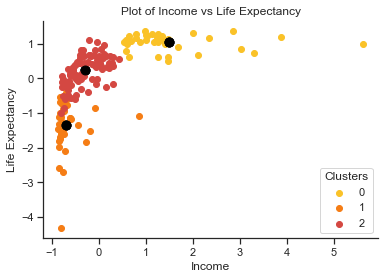

In [208]:
#visualizing the clusters:
for i in u_labels:
    plt.scatter(k_features[y_kmeans == i , 0] , k_features[y_kmeans == i , 2] , label = i)
    plt.scatter(centroids[:,0] , centroids[:,2] , s = 80, color = 'k')
plt.legend(title='Clusters')
plt.title('Plot of Income vs Life Expectancy')
plt.ylabel('Life Expectancy')
plt.xlabel('Income')
plt.show()

Our k means seems to do a good job of grouping the features into different clusters and finding the centers.
As suspected we observe that countries specific clusters are responsible for high values of child mortality, income and life expectancy.
We also notice the relationships between the features are unchanged.

In [209]:
#adding the cluster labels to our country data set and checking the average socio-economic values based on the clustered groups
country_new = country_df.copy()
country_new['clusters']=kmeans.labels_
country_new.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2


In [210]:
country_new.clusters.nunique()

3

In [211]:
#average socio-economic values per cluster
##sort by gdpp
country_new.groupby('clusters').mean().sort_values(by='gdpp',ascending=False)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
clusters,,,,,,,,,
0,5.710526,25685.834211,3602.516053,21499.513158,45771.052632,3.754737,79.905263,1.840526,41155.263158
2,22.575000,2665.079662,415.867260,2947.722500,11355.714286,7.757393,72.661905,2.381429,6180.761905
1,95.062222,873.665687,103.244118,792.546935,3777.400000,11.228111,58.728889,4.940667,1820.666667


In [212]:
#number of countries per cluster
country_new.pivot_table(index='clusters',values='country',aggfunc='count')

,country
clusters,
0,38
1,45
2,84


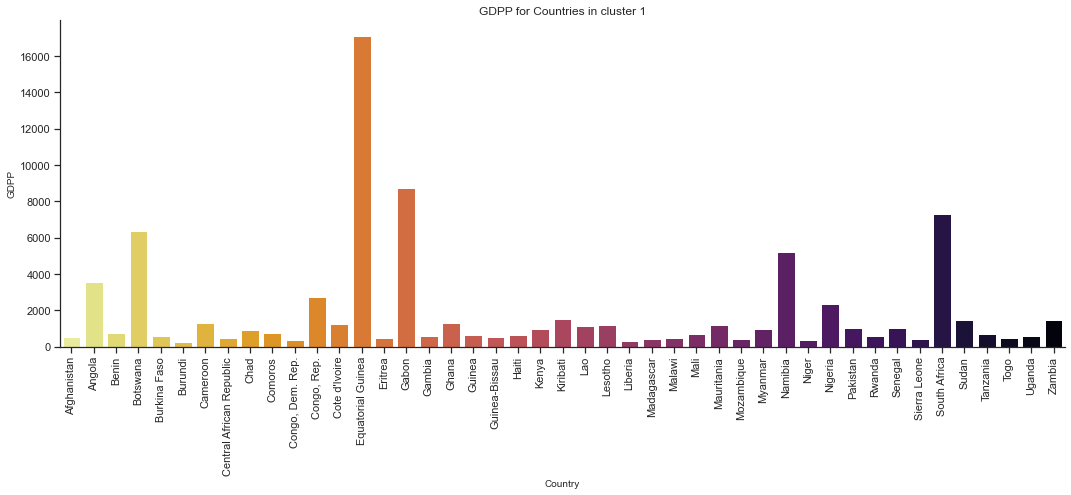

In [213]:
#Plot countries per cluster
fig = plt.figure(figsize = (18,6))
s=sb.barplot(data=country_new[country_new['clusters']==1],x='country',y='gdpp',palette='inferno_r')
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('GDPP', fontsize=10)
plt.title('GDPP for Countries in cluster 1')
plt.show()

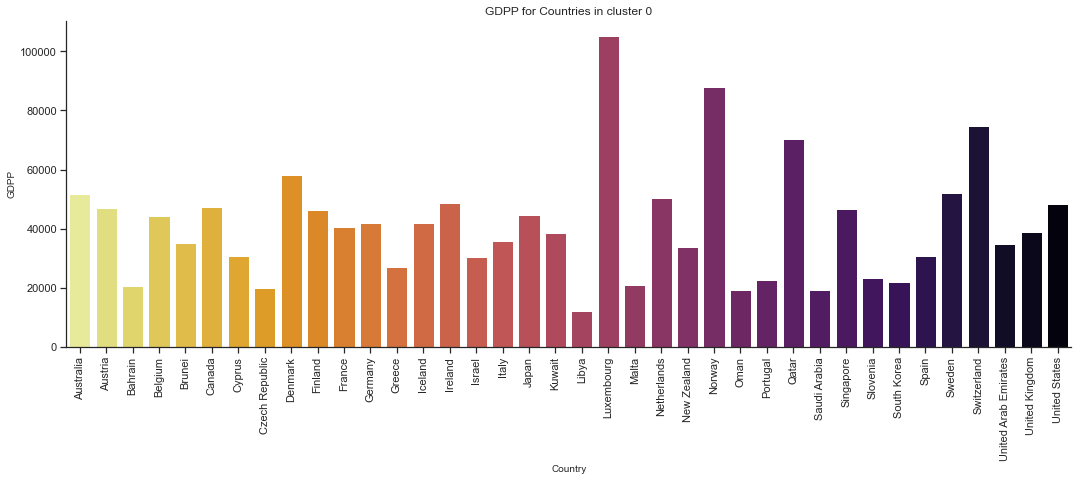

In [214]:
#Plot countries per cluster
fig = plt.figure(figsize = (18,6))
s=sb.barplot(data=country_new[country_new['clusters']==0],x='country',y='gdpp',palette='inferno_r')
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('GDPP', fontsize=10)
plt.title('GDPP for Countries in cluster 0')
plt.show()

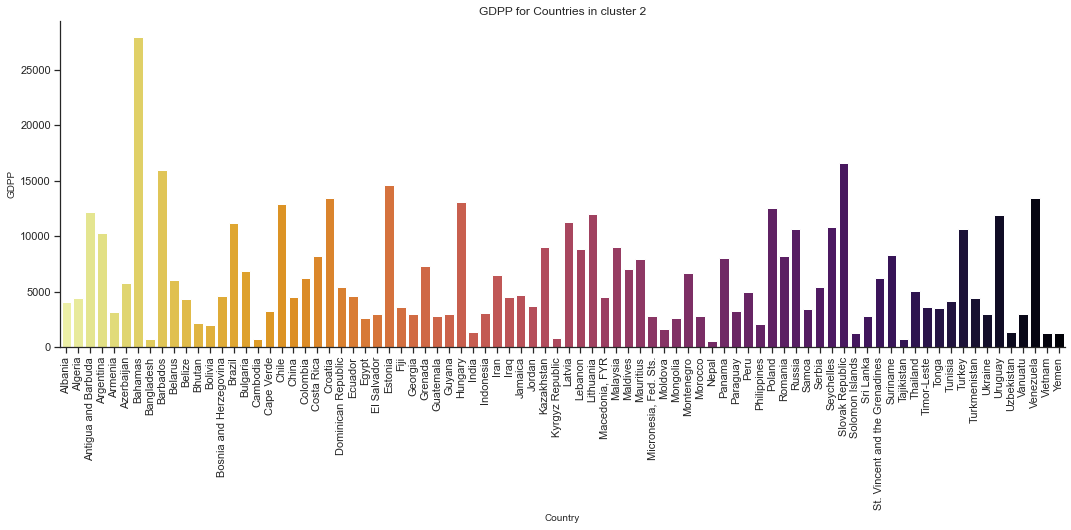

In [215]:
#Plot countries per cluster
fig = plt.figure(figsize = (18,6))
s=sb.barplot(data=country_new[country_new['clusters']==2],x='country',y='gdpp',palette='inferno_r')
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('GDPP', fontsize=10)
plt.title('GDPP for Countries in cluster 2')
plt.show()

In [216]:
#We can explore to see if we get better clusters by including more features and also verify if our clusters change

In [217]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [218]:
#selecting all numerical columns as features
features=country_df.iloc[:,1:]
features.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [219]:
#standardizing our features
features=preprocessing.StandardScaler().fit_transform(features)

In [220]:
features[0:1]

array([[ 1.29153238, -0.4110113 , -0.56503989, -0.4322755 , -0.8082454 ,
         0.15733622, -1.61909203,  1.90288227, -0.67917961]])

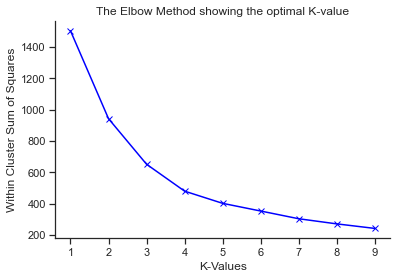

In [221]:
#Finding optimal K value
elbow_method(features,10)

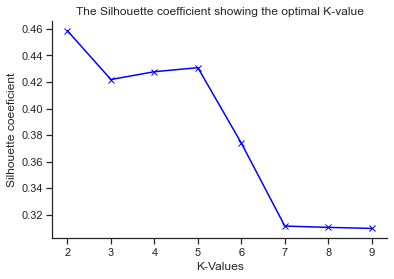

In [222]:
silhouette_method(features,10)

In [223]:
kmeans = KMeans(n_clusters = 3,random_state=4)
kmeans.fit(features)

KMeans(n_clusters=3, random_state=4)

In [224]:
y_kmeans = kmeans.predict(features)

In [225]:
pd.DataFrame(features).corr()

,0,1,2,3,4,5,6,7,8
0,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
1,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
2,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
3,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
4,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
5,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
6,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
7,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
8,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


In [226]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(y_kmeans)

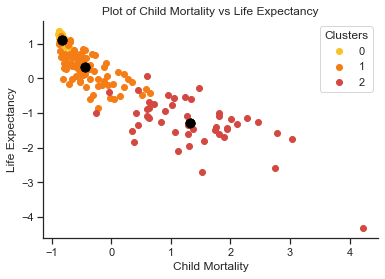

In [227]:
#visualizing the clusters
for i in u_labels:
    plt.scatter(features[y_kmeans == i , 0] , features[y_kmeans == i , 6] , label = i)
    plt.scatter(centroids[:,0] , centroids[:,6] , s = 80, color = 'k')
plt.legend(title='Clusters')
plt.title('Plot of Child Mortality vs Life Expectancy')
plt.ylabel('Life Expectancy')
plt.xlabel('Child Mortality')
plt.show()

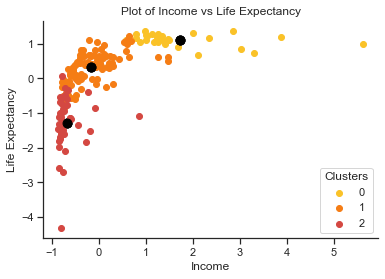

In [228]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(y_kmeans)
#visualizing the clusters
for i in u_labels:
    plt.scatter(features[y_kmeans == i , 4] , features[y_kmeans == i , 6] , label = i)
    plt.scatter(centroids[:,4] , centroids[:,6] , s = 80, color = 'k')
plt.legend(title='Clusters')
plt.title('Plot of Income vs Life Expectancy')
plt.ylabel('Life Expectancy')
plt.xlabel('Income')
plt.show()

In [229]:
#including the cluster labels in the dataset
country_df['cluster_labels']=kmeans.labels_
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


In [230]:
country_df['cluster_labels'].unique()

array([2, 1, 0], dtype=int32)

In [231]:
#we can aggregate the average socio-economic values per cluster
#sort by gdpp
cluster_agg = country_df.groupby('cluster_labels').mean().sort_values(by='gdpp',ascending=False).reset_index()
cluster_agg

,cluster_labels,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,5.046429,31038.239286,4327.163214,25818.100000,50178.571429,3.014679,80.514286,1.760714,48114.285714
1,1,20.357143,3604.149434,547.279455,3710.446386,13968.021978,7.070549,73.460440,2.235055,7979.912088
2,2,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333


In [232]:
cluster_std = country_df.groupby('cluster_labels').std().sort_values(by='gdpp',ascending=False).reset_index()
cluster_std

,cluster_labels,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,2.289183,35026.139893,2292.822837,28570.881329,21515.650757,4.353749,1.535437,0.297905,17756.891501
1,1,14.067394,3752.816160,575.140958,3450.055951,9326.576390,7.777400,4.024505,0.677301,6773.212754
2,2,34.319855,2252.474004,165.518331,1540.981910,5590.168621,15.362485,6.384914,1.036192,2925.911009


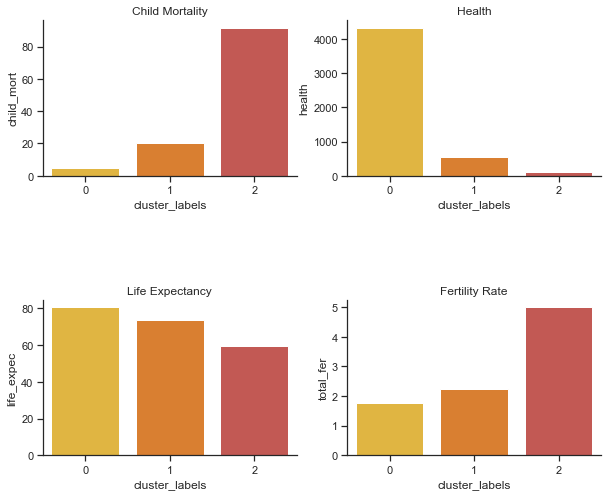

In [233]:

fig,ax=plt.subplots(2,2, figsize=(10,8))
plt.subplots_adjust(hspace=0.8)
sb.barplot(x='cluster_labels',y='child_mort',data=cluster_agg,ax=ax[0,0])
ax[0,0].set_title('Child Mortality')
sb.barplot(x='cluster_labels',y='health',data=cluster_agg,ax=ax[0,1])
ax[0,1].set_title('Health')
sb.barplot(x='cluster_labels',y='life_expec',data=cluster_agg,ax=ax[1,0])
ax[1,0].set_title('Life Expectancy')
sb.barplot(x='cluster_labels',y='total_fer',data=cluster_agg,ax=ax[1,1])
ax[1,1].set_title('Fertility Rate')
plt.show()

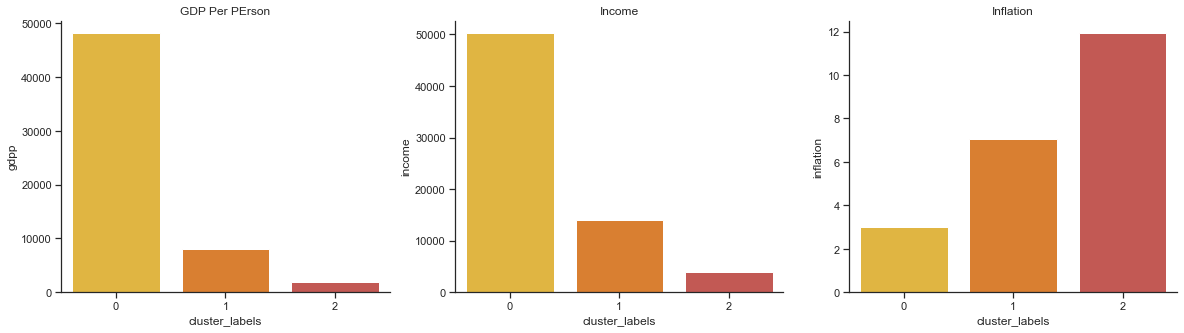

In [234]:
fig,ax=plt.subplots(1,3, figsize=(20,5))
plt.subplots_adjust(wspace=0.2)
sb.barplot(x='cluster_labels',y='gdpp',data=cluster_agg,ax=ax[0])
ax[0].set_title('GDP Per PErson')
sb.barplot(x='cluster_labels',y='income',data=cluster_agg,ax=ax[1])
ax[1].set_title('Income')
sb.barplot(x='cluster_labels',y='inflation',data=cluster_agg,ax=ax[2])
ax[2].set_title('Inflation')
plt.show()

Text(0.5, 1.0, 'Imports')

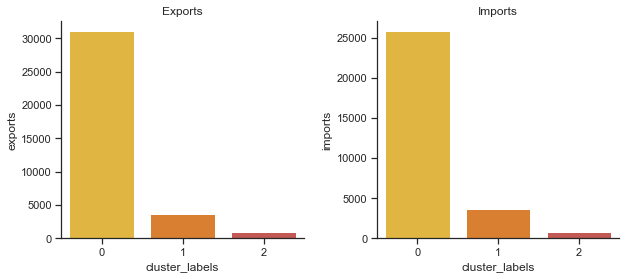

In [235]:
fig,ax=plt.subplots(1,2, figsize=(10,4))
plt.subplots_adjust(wspace=0.3)
sb.barplot(x='cluster_labels',y='exports',data=cluster_agg,ax=ax[0])
ax[0].set_title('Exports')
sb.barplot(x='cluster_labels',y='imports',data=cluster_agg,ax=ax[1])
ax[1].set_title('Imports')

In [236]:
country_df['cluster_labels']=country_df['cluster_labels'].map({0:'Developed Countries',
                                                               1:'Developing Countries',
                                                               2:'Underdeveloped Countries'})

In [237]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,Underdeveloped Countries
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,Developing Countries
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,Developing Countries
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,Underdeveloped Countries
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,Developing Countries


In [238]:
#number of countries per cluster
country_df.pivot_table(index='cluster_labels',values='country',aggfunc='count')

,country
cluster_labels,
Developed Countries,28
Developing Countries,91
Underdeveloped Countries,48


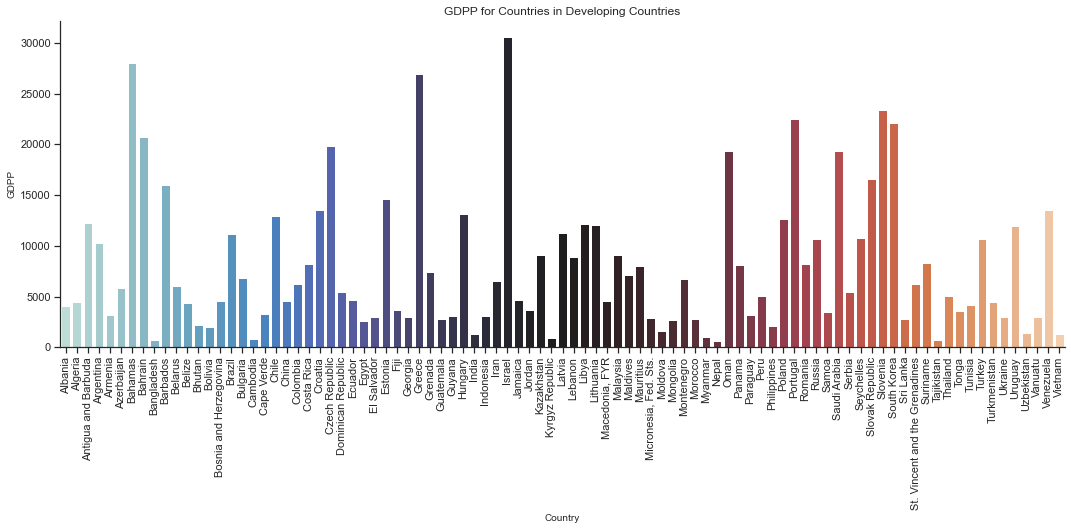

In [239]:
#Plot countries per cluster
fig = plt.figure(figsize = (18,6))
s=sb.barplot(data=country_df[country_df['cluster_labels']=='Developing Countries'],x='country',y='gdpp',palette='icefire')
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('GDPP', fontsize=10)
plt.title('GDPP for Countries in Developing Countries')
plt.show()

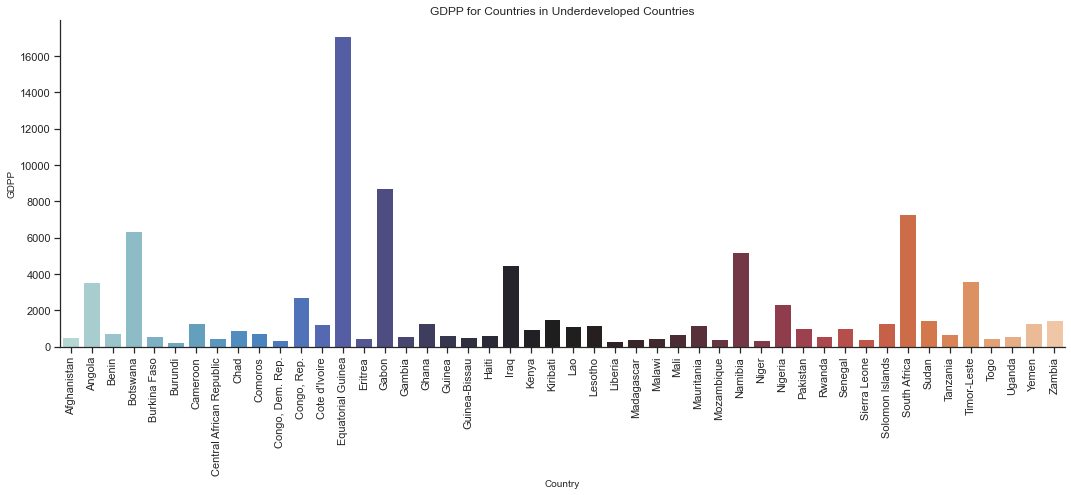

In [240]:
#Plot countries per cluster
fig = plt.figure(figsize = (18,6))
s=sb.barplot(data=country_df[country_df['cluster_labels']=='Underdeveloped Countries'],x='country',y='gdpp',palette='icefire')
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('GDPP', fontsize=10)
plt.title('GDPP for Countries in Underdeveloped Countries')
plt.show()

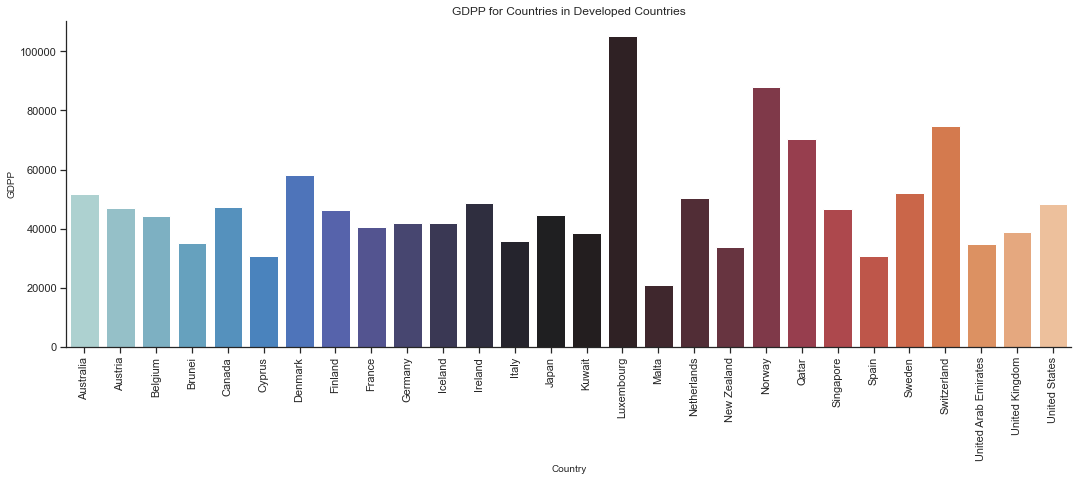

In [241]:
#Plot countries per cluster
fig = plt.figure(figsize = (18,6))
s=sb.barplot(data=country_df[country_df['cluster_labels']=='Developed Countries'],x='country',y='gdpp',palette='icefire')
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('GDPP', fontsize=10)
plt.title('GDPP for Countries in Developed Countries')
plt.show()

Text(0.5, 1.0, 'Amount of Exports Per Clusters')

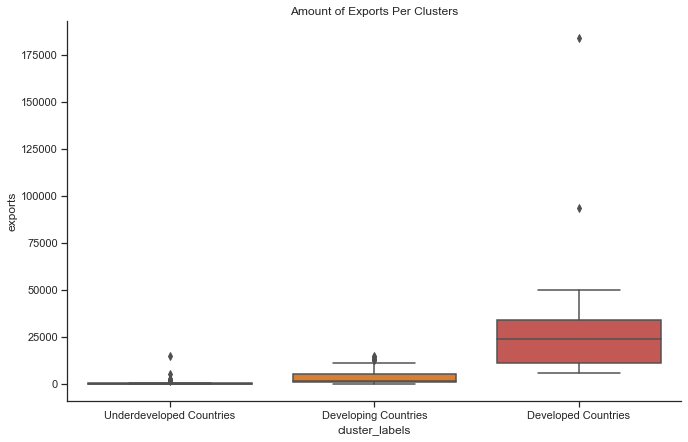

In [242]:
fig = plt.figure(figsize=(11,7))
sb.boxplot(x='cluster_labels',y='exports',data=country_df)
plt.title('Amount of Exports Per Clusters')

Text(0.5, 1.0, 'Amount of Imports Per Clusters')

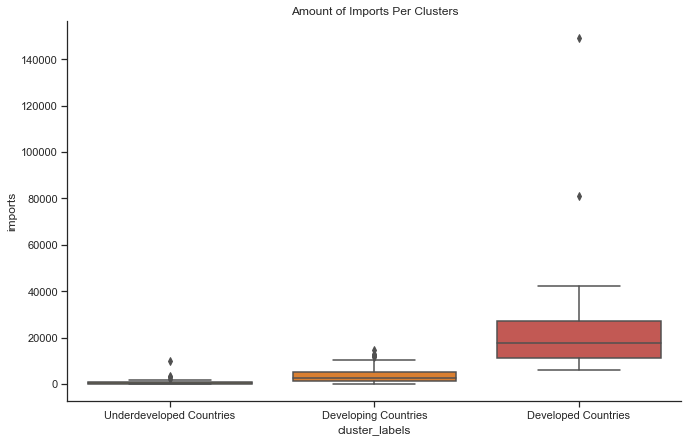

In [243]:
fig = plt.figure(figsize=(11,7))
sb.boxplot(x='cluster_labels',y='imports',data=country_df)
plt.title('Amount of Imports Per Clusters')

Text(0.5, 1.0, 'Income Per Clusters')

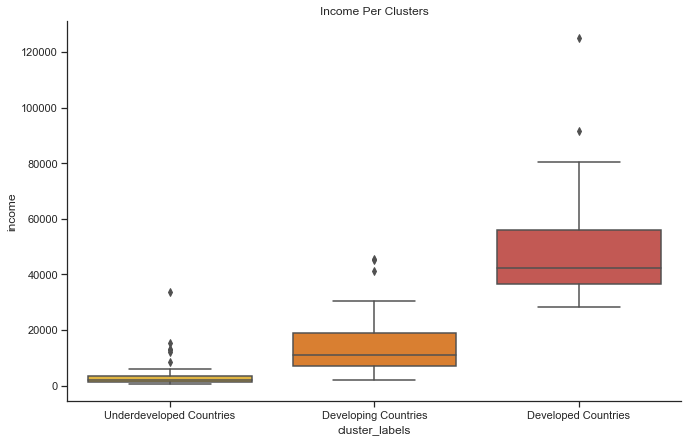

In [244]:
fig = plt.figure(figsize=(11,7))
sb.boxplot(x='cluster_labels',y='income',data=country_df)
plt.title('Income Per Clusters')

Text(0.5, 1.0, 'GDPP Per Clusters')

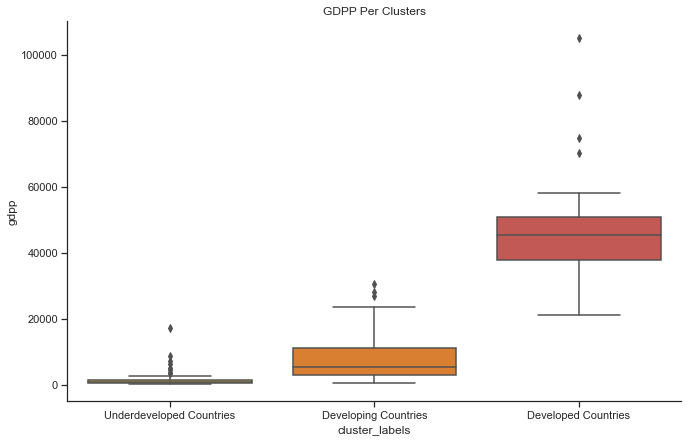

In [245]:
fig = plt.figure(figsize=(11,7))
sb.boxplot(x='cluster_labels',y='gdpp',data=country_df)
plt.title('GDPP Per Clusters')

Text(0.5, 1.0, 'GDPP vs Exports')

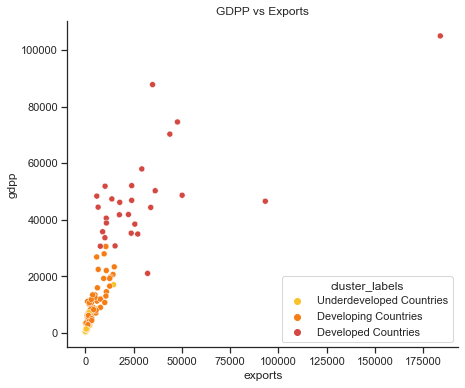

In [246]:
fig = plt.figure(figsize=(7,6))
sb.scatterplot(x='exports',y='gdpp',data=country_df,hue='cluster_labels')
plt.title('GDPP vs Exports')

Text(0.5, 1.0, 'health vs gdpp')

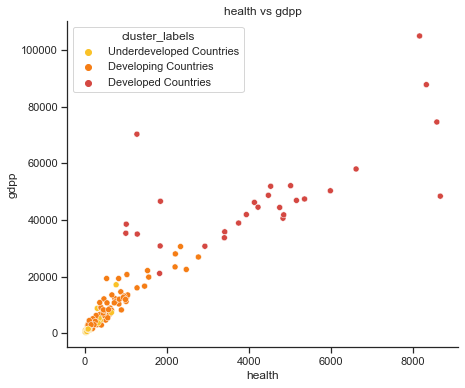

In [247]:
fig = plt.figure(figsize=(7,6))
sb.scatterplot(x='health',y='gdpp',data=country_df,hue='cluster_labels')
plt.title('health vs gdpp')

<AxesSubplot:xlabel='income', ylabel='gdpp'>

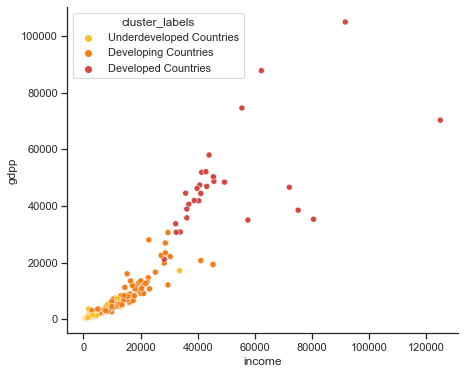

In [248]:
fig = plt.figure(figsize=(7,6))
sb.scatterplot(x='income',y='gdpp',data=country_df,hue='cluster_labels')

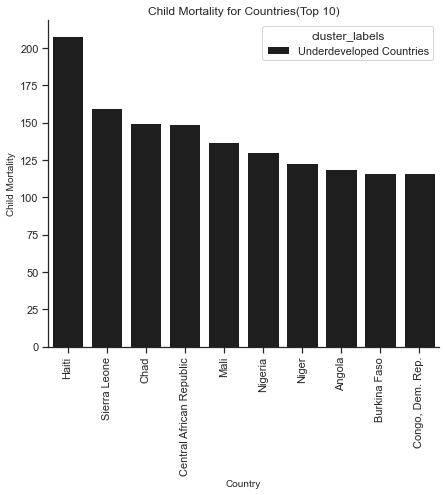

In [249]:
#Plot countries per cluster
fig = plt.figure(figsize = (7,6))
s=sb.barplot(data=country_df.sort_values('child_mort',ascending=False).head(10),x='country',y='child_mort',palette='icefire',hue='cluster_labels')
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('Child Mortality', fontsize=10)
plt.title('Child Mortality for Countries(Top 10)')
plt.show()

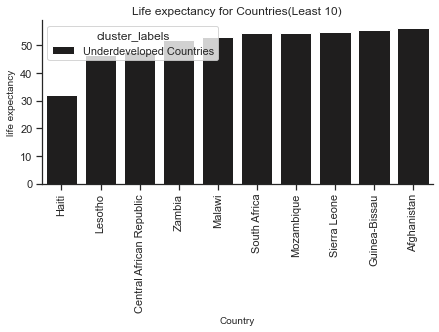

In [250]:
#Plot countries per cluster
fig = plt.figure(figsize = (7,3))
s=sb.barplot(data=country_df.sort_values('life_expec',ascending=True).head(10),x='country',y='life_expec',palette='icefire',hue='cluster_labels')
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('life expectancy', fontsize=10)
plt.title('Life expectancy for Countries(Least 10)')
plt.show()

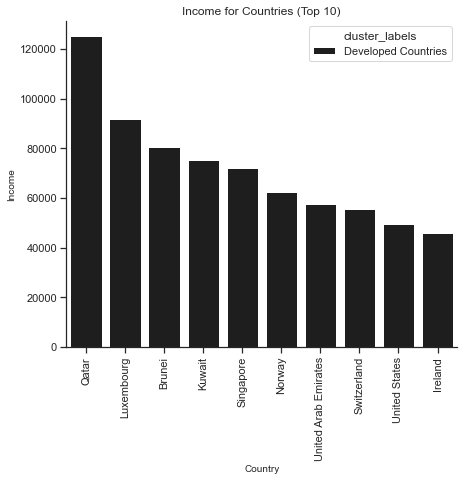

In [251]:
#Plot countries per cluster
fig = plt.figure(figsize = (7,6))
s=sb.barplot(data=country_df.sort_values('income',ascending=False).head(10),x='country',y='income',palette='icefire',hue='cluster_labels')
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('Income', fontsize=10)
plt.title('Income for Countries (Top 10)')
plt.show()

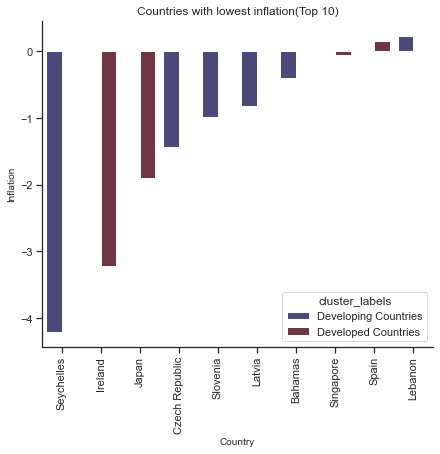

In [252]:
#Plot countries per cluster
fig = plt.figure(figsize = (7,6))
s=sb.barplot(data=country_df.sort_values('inflation',ascending=True).head(10),x='country',y='inflation',palette='icefire',hue='cluster_labels')
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('Inflation', fontsize=10)
plt.title('Countries with lowest inflation(Top 10)')
plt.show()